In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data

In [36]:
data=pd.read_csv('heart.csv')
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [37]:
data.rename(columns={'trtbps': 'blood_pressure'}, inplace=True)
data.rename(columns={'chol': 'cholesterol'}, inplace=True)
data

,age,sex,cp,blood_pressure,cholesterol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [38]:
data.isnull().any()

age               False
sex               False
cp                False
blood_pressure    False
cholesterol       False
fbs               False
restecg           False
thalachh          False
exng              False
oldpeak           False
slp               False
caa               False
thall             False
output            False
dtype: bool

In [39]:
data.describe()

,age,sex,cp,blood_pressure,cholesterol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Visualization

<AxesSubplot:>

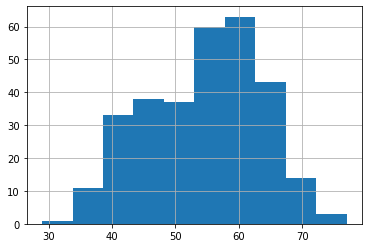

In [40]:
data['age'].hist()

<AxesSubplot:>

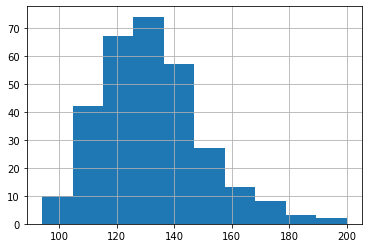

In [41]:
data['blood_pressure'].hist()

<AxesSubplot:>

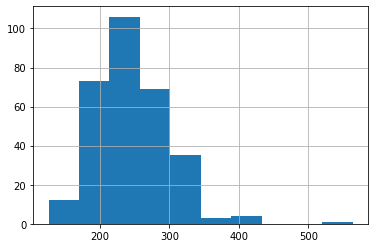

In [42]:
data['cholesterol'].hist()

Text(0, 0.5, 'Cholesterol')

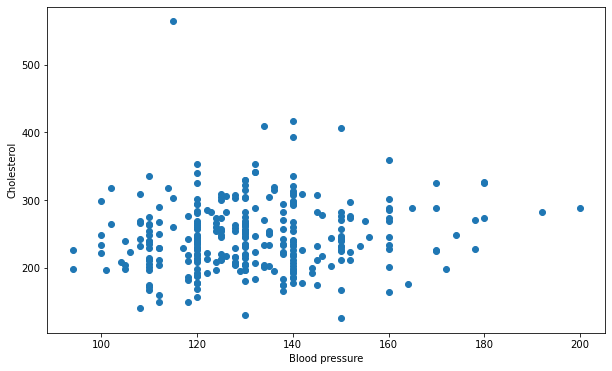

In [58]:
plt.figure(figsize=(10,6))
plt.scatter(data.blood_pressure, data.cholesterol)
plt.xlabel('Blood pressure')
plt.ylabel('Cholesterol')

# Model
## Building a linear regression

In [59]:
model = LinearRegression()

In [61]:
X=pd.DataFrame(data.blood_pressure) # переменная на основе которой будем предсказывать (артериальное давление)
y=pd.DataFrame(data.cholesterol) # переменная, которую предсказываем (холестерол)

In [62]:
model.fit(X,y)

LinearRegression()

In [63]:
model.coef_

array([[0.36401868]])

In [64]:
model.intercept_

array([198.35051794])

Text(0, 0.5, 'Cholesterol')

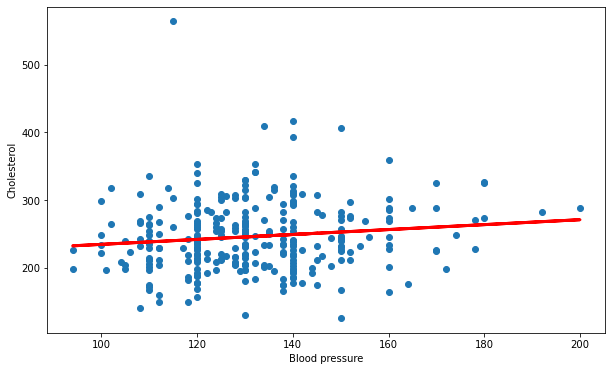

In [69]:
plt.figure(figsize=(10,6))
plt.scatter(data.blood_pressure, data.cholesterol)

plt.plot(X, model.predict(X), color='red', linewidth=3) # зависимость X и предсказанного моделью y

plt.xlabel('Blood pressure')
plt.ylabel('Cholesterol')

## Model accuracy

In [71]:
model.score(X,y)

0.01517188515488388

## Example of a prediction

In [72]:
model.predict([[120]])

array([[242.03275975]])